<a href="https://colab.research.google.com/github/vcautela/Modelos_Regressao_Case/blob/main/Case_ModelosRegress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white


## Data

In [3]:
df = pd.read_excel('/content/insurance.xlsx')
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['regiao'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
df.columns

Index(['idade', 'sexo', 'imc', 'quantidade_filhos', 'fumante', 'regiao',
       'custos_seguro'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [7]:
df.isnull().sum()

idade                0
sexo                 3
imc                  0
quantidade_filhos    0
fumante              0
regiao               0
custos_seguro        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
# transforamndo dados categóricos
le = LabelEncoder()

le.fit(df.sexo)
df.sexo = le.transform(df.sexo)

le.fit(df.fumante)
df.fumante = le.transform(df.fumante)

le.fit(df.regiao)
df.regiao = le.transform(df.regiao)

In [10]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.560,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1338 non-null   int64  
 1   sexo               1338 non-null   int64  
 2   imc                1338 non-null   float64
 3   quantidade_filhos  1338 non-null   int64  
 4   fumante            1338 non-null   int64  
 5   regiao             1338 non-null   int64  
 6   custos_seguro      1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


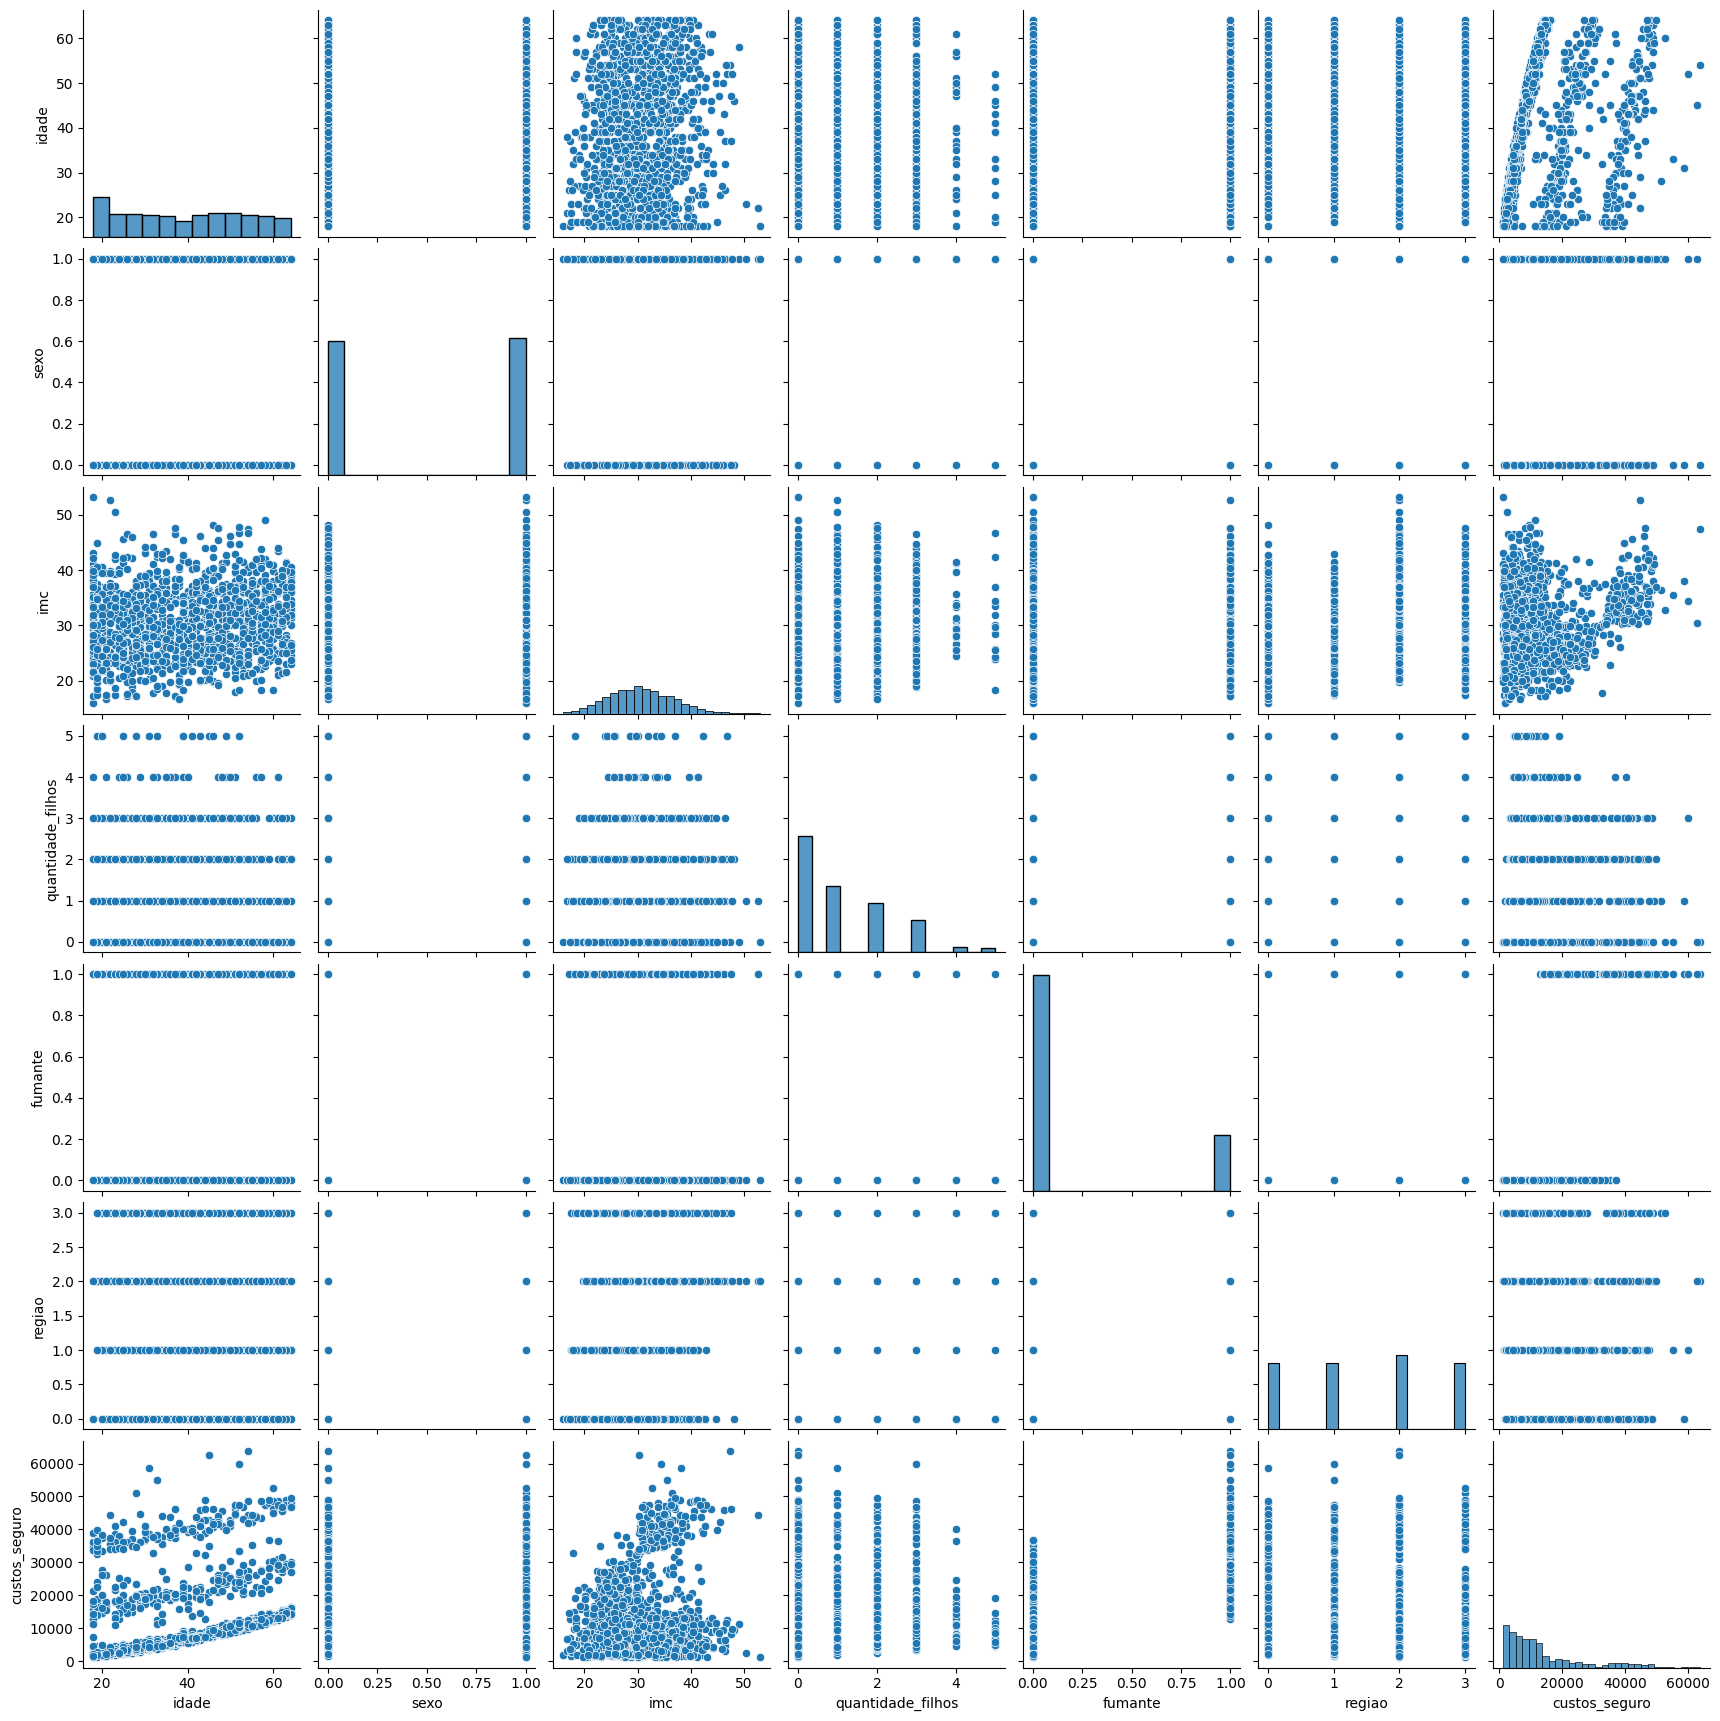

In [12]:
sns.pairplot(df)

<Axes: xlabel='custos_seguro', ylabel='Count'>

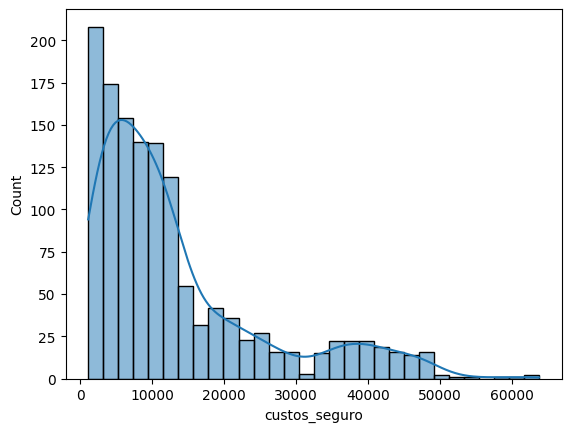

In [13]:
sns.histplot(df, x='custos_seguro', kde=True)

In [14]:
df.describe()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663815,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098367,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [15]:
# normalizando os dados
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
df_norm.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.473500,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


## Statsmodel smf

In [16]:
# estimadores de mínimos quadrados ordinários
function = 'custos_seguro~idade+sexo+imc+quantidade_filhos+fumante+regiao'
model = smf.ols(formula=function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:32:48   Log-Likelihood:                 1230.4
No. Observations:                1338   AIC:                            -2447.
Df Residuals:                    1331   BIC:                            -2410.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0479      0.00

In [17]:
# Análise de Resíduos

residuals = model.resid
fitted_values = model.fittedvalues

Text(0.5, 1.0, 'Gráfico de Resíduos versus Valores Ajustados')

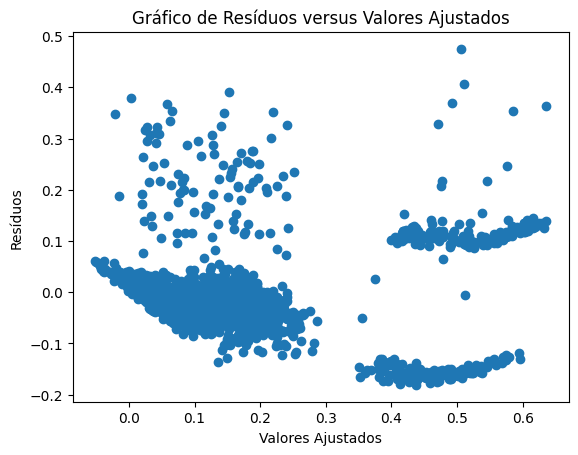

In [18]:
# Gráfico de Resíduos versus Valores Ajustados
plt.scatter(fitted_values, residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos versus Valores Ajustados')

se os pontos no gráfico estão distribuídos aleatoriamente em torno da linha horizontal em y=0, isso sugere linearidade.

Não deve haver padrões sistemáticos nos resíduos conforme os valores ajustados aumentam ou diminuem. Se houver algum padrão, como uma curva ou uma tendência, pode indicar falta de linearidade.N


**Gráfico de Quantis Normais (QQ-plot):**

Um QQ-plot compara os quantis dos resíduos com os quantis de uma distribuição normal padrão. Se os pontos no gráfico seguirem aproximadamente uma linha reta, isso sugere que os resíduos são normalmente distribuídos, o que é uma suposição da regressão linear.

In [19]:
# Teste de White
df_norm_adjust = sm.add_constant(df_norm.iloc[:, :-1])
white_test_stat, white_p_value, _, _ = het_white(residuals, df_norm_adjust)
print(f"White Test Statistic: {white_test_stat}")
print(f"White p-value: {white_p_value}")

White Test Statistic: 140.669681705386
White p-value: 4.328666850779008e-18


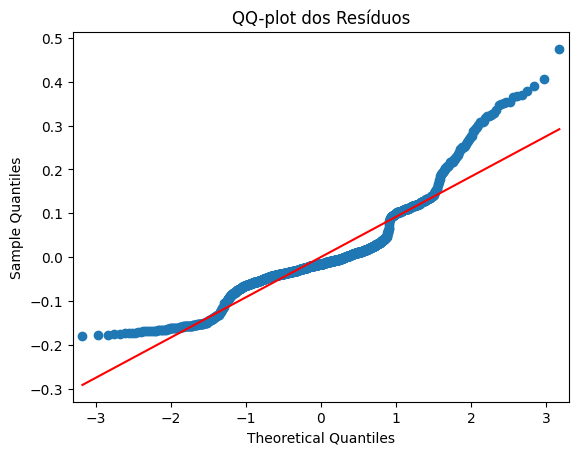

In [20]:
# Gráfico QQ-plot
sm.qqplot(residuals, line='r')
plt.title('QQ-plot dos Resíduos')
plt.show()

NESSE CASO A HIPOTESE NULA É A HOMOCEDASTICIDADE?

# Machine Learning

## Target/Features

In [49]:
# separando os dados em Target(y) e Features(x)
x = df_norm.drop(columns='custos_seguro')
x = np.asarray(x)
x

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.47350013, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [47]:
y = df_norm['custos_seguro']
y = np.asarray(y)
y

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

## Treino

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)




## Linear Regression

In [ ]:
# Treino
lr = LinearRegression()
lr.fit(x_train, y_train)

### Desempenho

In [43]:
r_sq = lr.score(x,y)
print('R²:',r_sq)
y_pred_train = lr.predict(x_train)
print('MAE(train):', metrics.mean_absolute_error(y_train, y_pred_train))
y_pred_test = lr.predict(x_test)
print('MAE(test):', metrics.mean_absolute_error(y_test, y_pred_test))

R²: 0.7505708882831723
MAE(train): 0.06676457213532819
MAE(test): 0.06788140425632558


## Random Forest Regressor

In [51]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

### Desempenho

In [52]:
r_sq = rfr.score(x,y)
print('R²:',r_sq)

y_pred_train = rfr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))

y_pred_test = rfr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

R²: 0.943099127229279
MAE: 0.016334062291763162
MAE: 0.040508519305715536


## Ada Boost Regressor

In [53]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

### Desempenho


In [54]:
r_sq = ada.score(x,y)
print('R²:',r_sq)

ada_pred_train = ada.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, ada_pred_train))

ada_pred_test = ada.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, ada_pred_test))

R²: 0.8283396725732691
MAE: 0.06189987035181421
MAE: 0.06850507745944051


## Gradient Boosting Regressor

In [55]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

### Desempenho

In [56]:
r_sq = gbr.score(x,y)
print('R²:',r_sq)

gbr_pred_train = gbr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, gbr_pred_train))

gbr_pred_test = gbr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred_test))

R²: 0.8943524412581457
MAE: 0.03219857799779008
MAE: 0.04044881238388808


### Hiperparametros


#### GridSearchCV


In [33]:
# tunando o gradient boosting regressor..

parameters = {'max_depth': [5],
              'min_samples_leaf': [4],
              'min_samples_split': [3],
              'n_estimators': [200]}

grid_search = GridSearchCV(gbr, parameters, scoring='r2', cv=2, n_jobs=-1)


In [34]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [4],
                         'min_samples_split': [3], 'n_estimators': [200]},
             scoring='r2')

In [35]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=3,
                          n_estimators=200)
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 200}


In [36]:
best_model = grid_search.best_estimator_

#### Parâmetros para GBR

In [37]:
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [38]:
gbr_tunned = GradientBoostingRegressor(alpha=0.9,
 ccp_alpha=0.0,
 criterion='friedman_mse',
 init=None,
 learning_rate=0.1,
 loss='squared_error',
 max_depth=5,
 max_features=None,
 max_leaf_nodes=None,
 min_impurity_decrease=0.0,
 min_samples_leaf=4,
 min_samples_split=3,
 min_weight_fraction_leaf=0.0,
 n_estimators=200,
 n_iter_no_change=None,
 random_state=None,
 subsample=1.0,
 tol=0.0001,
 validation_fraction=0.1,
 verbose=0,
 warm_start=False)

In [39]:
gbr_tunned.fit(x_train,y_train)
grb_tunned_pred = gbr_tunned.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Desempenho

In [40]:
r_sq = gbr_tunned.score(x,y)
print('R²:',r_sq)

gbr_tunned_pred_train = gbr_tunned.predict(x_train)
print("MAE", metrics.mean_absolute_error(y_train, gbr_tunned_pred_train))

gbr_tunned_pred_test = gbr_tunned.predict(x_test)
print("MAE", metrics.mean_absolute_error(y_test, gbr_tunned_pred_test))

R²: 0.9265673032525337
MAE 0.02237978897988891
MAE 0.043188749719883346
